# Tratamiento Inteligente de Datos

# Grado en Ingeniería Informática - Itinerario de Computación 

**Fecha:** 20 de Marzo del 2020  
**Alumno:** Miguel Angel Ordoñez  
- **Correo:** alu0101281087@ull.edu.es  

**Alumno:** Óscar Moreira Estévez
- **Correo:** alu0101209067@ull.edu.es  

**Alumno:** Adal Díaz Fariña  
- **Correo:** alu0101112251@ull.edu.es  


 

___

# Objetivo 

Construcciónd de un perceptrón simple y multicapa con los datos de consumición de alcohol en estudiantes.

- Dataframe : [enlace](https://www.kaggle.com/uciml/student-alcohol-consumption)

<br>

___


## **Librerías**

### Instalación de Librerías

In [0]:
pip install matplotlib sklearn pandas

### Cargamos las librerias
La utilidad de cada libería es la siguiente:

1. **pandas:** Manipulación y análisis de datos
2. **sklearn:** Construcción y evaluación del modelo

**NOTA:** En el caso de sklearn solamente se importan los "métodos" que se van a utilizar

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime

## **Cargamos los datos y visualizamos**

In [0]:
dataset_alumns = pd.read_csv('student.csv', delimiter=',')
dataset_alumns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


> En primer lugar, queremos dejar claro que en la práctica el conjunto de datos no es proporcional. De un tipo de datos tenemos muchos valores y de otros muy poco por lo que el perceptron no es preciso. Al generar la matrix de confusión y ver la precisión del perceptrón multicapa nos dimos cuenta de este error. En el siguiente código calculamos el nº de datos de cada conjunto.


In [0]:
result = {
    'Tipo 1': 0,
    'Tipo 2': 0,
    'Tipo 3': 0,
    'Tipo 4': 0,
    'Tipo 5': 0, 
}

for i in range(649):
  if(dataset_alumns['Dalc'][i] == 1):
    result['Tipo 1'] = result['Tipo 1'] + 1
  if(dataset_alumns['Dalc'][i] == 2):
     result['Tipo 2'] = result['Tipo 2'] + 1
  if(dataset_alumns['Dalc'][i] == 3):
     result['Tipo 3'] = result['Tipo 3'] + 1
  if(dataset_alumns['Dalc'][i] == 4):
     result['Tipo 4'] = result['Tipo 4'] + 1
  if(dataset_alumns['Dalc'][i] == 5):
     result['Tipo 5'] = result['Tipo 5'] + 1

print('Conjunto de datos')

print(result)

Conjunto de datos
{'Tipo 1': 451, 'Tipo 2': 121, 'Tipo 3': 43, 'Tipo 4': 17, 'Tipo 5': 17}


> Podemos ver que los datos están muy desproporcionados ya que el conjunto 1 tiene aproximadamente un 70% de los estudiantes.

> Seleccionamos las variables más relevantes del conjunto original para nuestro estudio.

In [0]:
columns = ['sex', 'age', 'address', 'famsize',	'Pstatus', 	'Mjob', 'Fjob', 'reason', 'guardian', 'studytime', 'activities', 	'internet', 	'romantic', 'freetime', 'Dalc']

data = dataset_alumns[columns]

> Filtramos las variables porque no podemos entrenar un perceptrón con valores nulos.

In [0]:
data_clean = data.dropna()


> Del conjunto de variables escogidas, las variables que son de tipo string se convierten datos numéricos.

In [0]:
romantic    = {'yes': 1, 'no': 0}
activities  = {'yes': 1, 'no': 0}
sex         = {'F': 1,'M': 2}
address     = {'U': 1,'R': 2}
famsize     = {'GT3': 1,'LE3': 2}
Pstatus     = {'A': 1,'T': 2}
internet    = {'yes': 1, 'no': 0}
Mjob        = {'teacher':0 , 'health':1 , 'services':2 , 'at_home':3, 'other':4}
Fjob        = {'teacher':0 , 'health':1 , 'services':2 , 'at_home':3, 'other':4}
reason      = {'home':0, 'reputation':1, 'course':2, 'other':3}
guardian    = {'mother':0, 'father': 1, 'other':2}


> Sustituimos las variables una vez convertidas para trabajar con datos númericos. 

In [0]:
data_clean.romantic   = [romantic[item] for item in data_clean.romantic]
data_clean.activities = [activities[item] for item in data_clean.activities]
data_clean.sex        = [sex[item] for item in data_clean.sex]
data_clean.address    = [address[item] for item in data_clean.address]
data_clean.famsize    = [famsize[item] for item in data_clean.famsize]
data_clean.Pstatus    = [Pstatus[item] for item in data_clean.Pstatus]
data_clean.internet   = [internet[item] for item in data_clean.internet]
data_clean.Mjob       = [Mjob[item] for item in data_clean.Mjob]
data_clean.Fjob       = [Fjob[item] for item in data_clean.Fjob]
data_clean.reason     = [reason[item] for item in data_clean.reason]
data_clean.guardian   = [guardian[item] for item in data_clean.guardian]

> Se muestran los datos filtrados

In [0]:
data_clean

,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,studytime,activities,internet,romantic,freetime,Dalc
0,1,18,1,1,1,3,0,2,0,2,0,0,0,3,1
1,1,17,1,1,2,3,4,2,1,2,0,1,0,3,1
2,1,15,1,2,2,3,4,3,0,2,0,1,0,3,2
3,1,15,1,1,2,1,2,0,0,3,1,1,1,2,1
4,1,16,1,1,2,4,4,0,1,2,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,19,2,1,2,2,4,2,0,3,1,1,0,4,1
645,1,18,1,2,2,0,2,2,0,2,0,1,0,3,1
646,1,18,1,1,2,4,4,2,0,2,1,0,0,1,1
647,2,17,1,2,2,2,2,2,0,1,0,1,0,4,3


## **Calculamos las medias**

> En función de la edad calculamos las medias para ver el consumo de alcohol de los estudiantes tanto entre semana.

> En esta tabla se refleja el consumo de alcohol de los estudiantes entre semana(Dalc). 

In [0]:
data_mean = data_clean[['age', 'Dalc']]
grouped_data = data_mean.groupby('age')
data_mean = round(grouped_data.mean(), 0)
data_mean 

,Dalc
age,
15,1.0
16,1.0
17,2.0
18,2.0
19,2.0
20,1.0
21,3.0
22,5.0


In [0]:
data_mean['age'] = sorted(data_clean['age'].unique())

## **Consumo de alcohol los fines de semana según la edad**

> Instalamos *Plotly Express* la cual sirve para mostrar gráficos.

In [0]:
pip install plotly_express

In [0]:
import plotly_express as px

> Mostramos el gráfico de barras de la edad sobre el consumo medio de alcohol.

In [0]:
fig = px.bar(round(data_mean,0), x='age', y='Dalc', color='Dalc')
fig.show()

## Conclusión de la gráfica

> Se puede observar el consumo medio de alcohol por edad, en el caso de 22 años es el que mayor consumición hacen.

> Sin embargo, estos datos no son una representación real ya que los datos no están equilibrados como se explicó en la introducción. 

## **Procesador de datos**

> Generamos los conjuntos de entrenamiento y de validación.

In [0]:
train_size = 0.75 
test_size = 1 - train_size

# Se obtienen todas las columnas menos la objetivo
patterns_input = data_clean.drop('Dalc', axis=1)
# Se obtiene la columna objetivo
patterns_target = data_clean['Dalc']

# Se divide en datos de entrenamiento y validación
input_train, input_valid, target_train, target_valid = train_test_split(patterns_input, patterns_target, train_size=train_size, test_size=test_size, random_state=0, shuffle=True)

# Se divide el cojunto de validación en dos subconjuntos nuevos que serán utilizados en el MLP
input_test, input_valid, target_test, target_valid = train_test_split(input_valid, target_valid, train_size=train_size,test_size=test_size, random_state=0, shuffle=True)

print("\n--- Datos de Entrenamiento ---")
print(f"Tamaño input_train : ", input_train.size)
print(f"Tamaño target_train : ", target_train.size)

print("\n--- Datos de Validacion ---")
print(f"Tamaño input_valid : {input_valid.size}")
print(f"Tamaño target_valid : {target_valid.size}")

print("\n--- Datos de Test ---")
print(f"Tamaño input_test : ", input_test.size)
print(f"Tamaño target_test : ", target_test.size)


--- Datos de Entrenamiento ---
Tamaño input_train :  6804
Tamaño target_train :  486

--- Datos de Validacion ---
Tamaño input_valid : 574
Tamaño target_valid : 41

--- Datos de Test ---
Tamaño input_test :  1708
Tamaño target_test :  122


## **Resultados iniciales Perceptrón Simple**

> En este momento se ejcuta el perceptrón simple con una cantidad X de iteraciones.

In [0]:
max_iter = 30

per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(input_train, target_train)

predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

-- Epoch 1
Norm: 53.75, NNZs: 12, Bias: 2.000000, T: 486, Avg. loss: 65.578189
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 84.58, NNZs: 14, Bias: 4.000000, T: 972, Avg. loss: 58.506173
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 103.49, NNZs: 14, Bias: 5.000000, T: 1458, Avg. loss: 57.746914
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 124.42, NNZs: 14, Bias: 6.000000, T: 1944, Avg. loss: 56.185185
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 147.14, NNZs: 13, Bias: 7.000000, T: 2430, Avg. loss: 55.847737
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 156.03, NNZs: 14, Bias: 8.000000, T: 2916, Avg. loss: 58.261317
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 164.10, NNZs: 14, Bias: 9.000000, T: 3402, Avg. loss: 57.366255
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 176.76, NNZs: 14, Bias: 11.000000, T: 3888, Avg. loss: 60.425926
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 177.88, NNZs: 14, Bias: 13.000000, T: 4374, Avg. loss: 62.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


## Conclusión de resultados

Se puede observar que la precisión no es tan alta y presenta errores. Esto posiblemente se debe a dos escenarios:

- Los datos no están distribuidos de forma proporcional.
- Las variables escogidas no representan un conjuntos que sea linealmente separable, que es un requisito indispensable para el correcto funcionamiento del perceptrón.

## **Resultados iniciales Perceptrón Multicapa**

> Para tener una mayor precisión se ejecuta un perceptrón multicapa.

In [0]:
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
   """
   Train and valid MLP every valid_cycles iterations
   """
   classes  = np.unique(target_train)
   loss_valid = []
   for i in range(int(max_iter/valid_cycles)):
       for j in range(valid_cycles):
           out = mlp.partial_fit(input_train, target_train, classes)
           # Calculate loss function of valid set
       last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
       loss_valid.append(last_lost_valid)
       if verbose:
           print("Iteration %d, train loss = %.8f, valid loss = %.8f" %(mlp.n_iter_, mlp.loss_, last_lost_valid))
       if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
           if verbose:
               print("Early stopping: Validation score did not improve")
           break
   if verbose: print(out)
   
   if verbose:
       # Visualizing the Cost Function Trajectory
       # (https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html#Visualizing-the-Cost-Function-Trajectory)
       print("Visualizing the Cost Function Trajectory")
       plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
       plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
       plt.xlabel('number of iterations')
       plt.ylabel('loss function')
       plt.legend(loc='upper right')
       plt.show()

> Se esta entrenando el *MLP* con 65 neuronas, 300 iteraciones como máximo, un ratio de aprendizaje de 0.001 y se valida cada 5 ciclos.

Iteration 5, train loss = 1.89747818, valid loss = 1.56578731
Iteration 10, train loss = 1.00296472, valid loss = 1.25000882
Iteration 15, train loss = 0.96266170, valid loss = 1.15656286
Iteration 20, train loss = 0.95658189, valid loss = 1.15518881
Iteration 25, train loss = 0.94845394, valid loss = 1.14496007
Iteration 30, train loss = 0.94398157, valid loss = 1.13538773
Iteration 35, train loss = 0.93848256, valid loss = 1.12793343
Iteration 40, train loss = 0.93496769, valid loss = 1.12181325
Iteration 45, train loss = 0.93113493, valid loss = 1.11528516
Iteration 50, train loss = 0.92773153, valid loss = 1.10977446
Iteration 55, train loss = 0.92342199, valid loss = 1.10696997
Iteration 60, train loss = 0.91956091, valid loss = 1.10363406
Iteration 65, train loss = 0.91573008, valid loss = 1.10061075
Iteration 70, train loss = 0.91165381, valid loss = 1.09797977
Iteration 75, train loss = 0.90815853, valid loss = 1.09392250
Iteration 80, train loss = 0.90510344, valid loss = 1.09

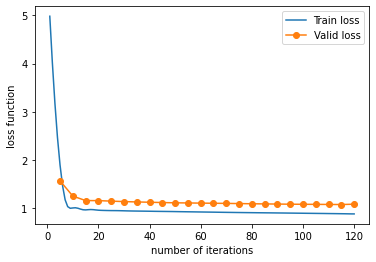

In [0]:
n_hidden = 65
max_iter = 300
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True

mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)
MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)



> Se muestran los resultados del *MLP* despues de haberlo entrenado.
> Para ver la precisión del *MLP* mostraremos la matriz de confusión y reporte de clasificiación.

In [0]:
predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

print("\n--- Resultados de Entrenamiento ---")
print("\nTrain confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("\nTrain classification report:")
print(classification_report(target_train, predict_train))

print("\n--- Resultados de Validacion ---")
print("\nValid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("\nValid classification report:")
print(classification_report(target_valid, predict_valid))

Train accuracy: 69.547%
Valid accuracy: 60.976%

--- Resultados de Entrenamiento ---

Train confusion matrix:
[[338   0   0   0   0]
 [ 89   0   0   0   0]
 [ 34   0   0   0   0]
 [ 12   0   0   0   0]
 [ 13   0   0   0   0]]

Train classification report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82       338
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13

    accuracy                           0.70       486
   macro avg       0.14      0.20      0.16       486
weighted avg       0.48      0.70      0.57       486


--- Resultados de Validacion ---

Valid confusion matrix:
[[25  0  0  0  0]
 [ 9  0  0  0  0]
 [ 4  0  0  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  0  0]]

Valid classification report:
              precision    recall  f1-score   support

           1       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Conclusión de los resultos 

> A pesar de que el *MPL* tiene la capacidad de resolver problemas que no son linealmente separables y de esta manera se puede evitar uno de los problemas antes comentados, se puede observar que el perceptrón sigue teniendo resultados similares.

> Por lo tanto concluimos que el error es debido a la proporción de los datos del dataframe.

## **Optimización ratio de aprendizaje**

> Buscamos el ratio de aprendizaje más adeuado entre 0.001 y 0.1.

In [0]:
tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'relu'
random_state = 0
now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
   mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
   MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
   loss_curves.append(mlp.loss_curve_)

> Mostramos la gráfica para ver la evolución del error a lo largo de los ciclos para los diferentes ratios estudiados. 

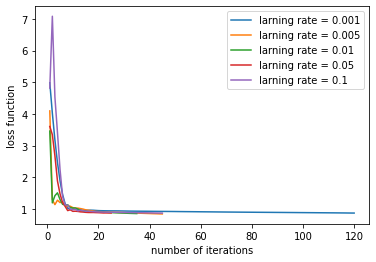

In [0]:
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
   plt.plot(range(1, len(loss_curve)+1), loss_curve, label='larning rate = ' + str(lr))
   
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()

## Conclusión de la gráfica

> Podemos ver que el ratio más estable y adecuado es el 0.1 para este conjunto de datos.

## **Optimización arquitectura**

> Buscamos el número de neuronas más adeuado entre 10 y 190.

In [0]:
tests_n_hidden = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190]
n_reps = 10
activation = 'relu'
# activation = 'logistic'
learning_rate_init = 0.1
now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []

for n_hidden in tests_n_hidden:
   max_acc_train = max_acc_valid = 0.0
   for random_state in range(n_reps):
       mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
       MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
       
       acc_train = accuracy_score(target_train, mlp.predict(input_train))
       acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
       print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
       if (max_acc_valid < acc_valid):
           max_acc_valid = acc_valid
           max_acc_train = acc_train
           if (acc_valid > best_acc):
               best_acc = acc_valid
               best_mlp = mlp

   accs_train.append(max_acc_train)
   accs_valid.append(max_acc_valid)
   print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))
   

Seed = 0, train acc = 0.69547325, valid acc = 0.60975610, iterations = 45
Seed = 1, train acc = 0.69547325, valid acc = 0.60975610, iterations = 40
Seed = 2, train acc = 0.69547325, valid acc = 0.60975610, iterations = 35
Seed = 3, train acc = 0.69547325, valid acc = 0.60975610, iterations = 35
Seed = 4, train acc = 0.69547325, valid acc = 0.60975610, iterations = 55
Seed = 5, train acc = 0.69547325, valid acc = 0.60975610, iterations = 30
Seed = 6, train acc = 0.69547325, valid acc = 0.60975610, iterations = 80
Seed = 7, train acc = 0.69547325, valid acc = 0.60975610, iterations = 10
Seed = 8, train acc = 0.69547325, valid acc = 0.60975610, iterations = 50
Seed = 9, train acc = 0.69547325, valid acc = 0.60975610, iterations = 45
Number hidden units = 10, train acc = 0.69547325, max valid acc = 0.60975610
Seed = 0, train acc = 0.69753086, valid acc = 0.60975610, iterations = 35
Seed = 1, train acc = 0.69547325, valid acc = 0.60975610, iterations = 70
Seed = 2, train acc = 0.69547325, v

In [0]:
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Number of seconds for training: 25
Best MLP valid accuracy: 63.41463415%
Best MLP:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=3, shuffle=False, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


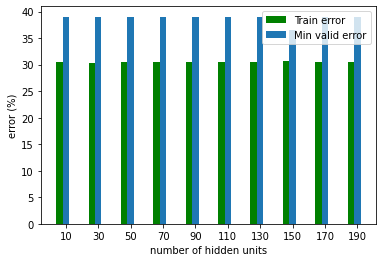

In [0]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()

## Conclusión
> Este algoritmo según el porcentaje de validación escoge el mejor resultado. En nuestro caso es con 150 neuronas y se puede ver que la gráfica no varía mucho entre las diferentes cantidades de neuronas.

> Esto es debido a lo que ya hemos explicado sobre la proporción de valores.

# **Resultado mejor MLP**

In [0]:
predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))

print("\n------ Resultados Entrenamiento ------")
print("\nTrain confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("\nTrain classification report:")
print(classification_report(target_train, predict_train))

print("\n------ Resultados Validacion  ------")
print("\nValid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("\nValid classification report:")
print(classification_report(target_valid, predict_valid))

print("\n------ Resultados Test  ------")
print("\nTest confusion matrix:")
print(confusion_matrix(target_test, predict_test))
print("\nTest classification report:")
print(classification_report(target_test, predict_test))


Train accuracy: 69.342%
Valid accuracy: 63.415%
Test accuracy: 72.951%

------ Resultados Entrenamiento ------

Train confusion matrix:
[[337   0   1   0   0]
 [ 86   0   3   0   0]
 [ 34   0   0   0   0]
 [ 12   0   0   0   0]
 [ 13   0   0   0   0]]

Train classification report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82       338
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13

    accuracy                           0.69       486
   macro avg       0.14      0.20      0.16       486
weighted avg       0.49      0.69      0.57       486


------ Resultados Validacion  ------

Valid confusion matrix:
[[25  0  0  0  0]
 [ 8  0  1  0  0]
 [ 3  0  1  0  0]
 [ 2  0  0  0  0]
 [ 1  0  0  0  0]]

Valid classification report:
              precision    recall  f1-score  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



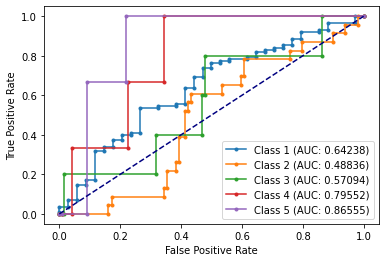

In [0]:
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(target_train)

mlp_auc = []
mlp_fpr = []
mlp_tpr = []

for cla in classes:
  cla = int(cla)
  mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,cla - 1]))
  fpr, tpr, _  = roc_curve(target_test==cla, mlp_probs[:,cla - 1])
  mlp_fpr.append(fpr)
  mlp_tpr.append(tpr)

for cla in classes:
  cla = int(cla)
  # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(mlp_fpr[cla - 1], mlp_tpr[cla - 1], marker='.', label='Class %d (AUC: %.5f)' % (cla, mlp_auc[cla - 1]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

___

# Conclusión final

Como hemos podido ver a lo largo de todos los resultados que hemos obtenido, se puede evidenciar la desproporción de los datos de consumición de alcohol. Por tal razón, aunque apliquemos correctamente tanto el perceptrón simple como el multicapa la precisión no termina de ser la esperada.

Por ejemplo, el caso de la clase 1 de consumición de alcohol representa más de la mitad de los estudiantes.